In [17]:
from typing import List, Dict, Tuple

import warnings

import json
import os
import mimetypes

import numpy as np
import pandas as pd

from plot_from_dict import plot_from_dict

In [6]:
%cd ..
%cd ..
%pwd

c:\Users\Florent\GNN\ML_research_seminar\model
c:\Users\Florent\GNN\ML_research_seminar


c:\Users\Florent\anaconda3\envs\testenc\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'c:\\Users\\Florent\\GNN\\ML_research_seminar'

In [10]:
list_dict = []

path_results = "./model/results/"

with os.scandir(path_results) as entries:

    for entry in entries:

        if entry.is_file() :

          name = entry.name

          if 'json' in mimetypes.guess_type(name)[0] :

            with open(f"{path_results}/{name}", 'r') as file:

              data = json.load(file)

            list_dict.append(data)

In [11]:
list_dict

[{'dataset': 'MUTAG',
  'max_epochs': 200,
  'patience': 20,
  'lr': 0.005,
  'convolution_layer': 'GCN',
  'global_pooling_layer': 'mean',
  'local_pooling_layer': 'SAG',
  'nb_parameters': 9352,
  'mean_accuracy': 0.7456140350877193,
  'std_accuracy': 0.01240538212607982}]

In [13]:
path_homophily = "./homophily/homophily_data.csv"

df_homophily = pd.read_csv(path_homophily)
df_homophily['Name_Dataset'] = df_homophily['Name_Dataset'].apply(lambda s : s.upper())
df_homophily.head()

,Name_Dataset,Seed,Homophily_edge_train,Homophily_edge_test,Homophily_node_train,Homophily_node_test,Homophily_edge_insensitive_train,Homophily_edge_insensitive_test
0,MUTAG,12345,0.721,0.722,0.661,0.662,0.034,0.035
1,ENZYMES,12345,0.667,0.660,0.665,0.664,0.370,0.399
2,PROTEINS,12345,0.657,0.654,0.652,0.648,0.372,0.367
3,PATTERN,12345,0.333,0.333,0.333,0.333,0.000,0.000
4,CLUSTER,12345,0.905,0.905,0.901,0.901,0.009,0.000


In [14]:
for dic in list_dict :
  name_dataset = dic["dataset"]
  dic["homophily"] = df_homophily.loc[df_homophily['Name_Dataset'] == name_dataset, 'Homophily_edge_train'].values[0]

In [19]:
dict_test = list_dict[0].copy()

In [21]:
dict_test.pop("zehkcbn")

KeyError: 'zehkcbn'

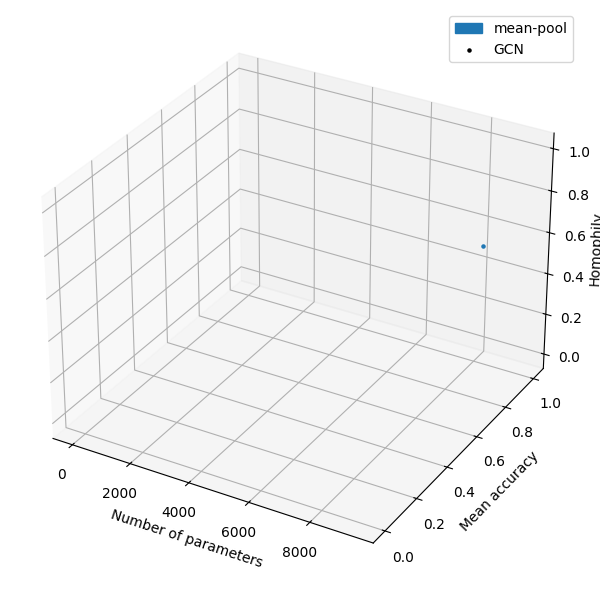

In [18]:
plot_from_dict(list_dict, (6,7));

In [17]:
test_list_dict = [{'convolution_layer' : 'GCN',
                   'global_pooling_layer' : 'mean-pool',
                   'nb_parameters' : 1000,
                   'mean_accuracy' : 0.5,
                   'homophily' : 0.8,
                   },
                  {'convolution_layer' : 'GRU',
                   'global_pooling_layer' : 'max-pool',
                   'nb_parameters' : 2000,
                   'mean_accuracy' : 0.7,
                   'homophily' : 0.3,
                   }
                  ]